In [1]:
from pathlib import Path
import yaml
import numpy as np
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
import astropy.units as u
from matplotlib import pyplot as plt
from matplotlib.colors import PowerNorm
import seaborn as sns
import cmasher as cmr

import mes_longslit as mes

/Users/will/Dropbox/teresa-pn-ou5/.venv/lib/python3.11/site-packages/FITS_tools/__init__.py:33: UserWarning: module 'astropy.config.configuration' has no attribute 'update_default_config', which has been deprecated in astropy 6.1.1.
  warn(wmsg)


In [2]:
np.seterr(all="ignore")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
sns.set_context("talk")

In [4]:
c0 = SkyCoord("21 14 20.03 +43 41 36.0", unit=(u.hourangle, u.deg))
c0.ra.deg, c0.dec.deg

(318.58345833333334, 43.69333333333333)

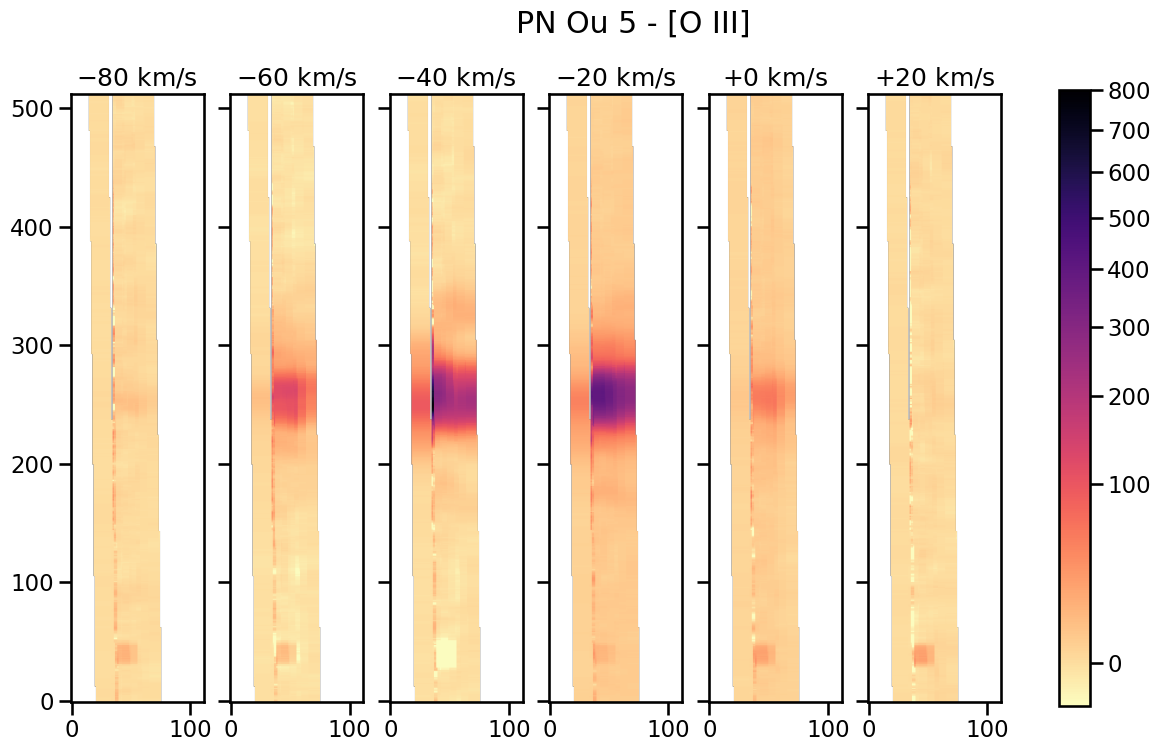

In [5]:
fig, axes = plt.subplots(
    1, 6, 
    figsize=(15, 8), 
    sharex=True,
    sharey=True,
    #subplot_kw=dict(projection=w)
)

for v0, ax in zip([-80, -60, -40, -20, 0, 20], axes):

    hdulist = mes.make_vmap(
        v0, c0.ra.deg, c0.dec.deg, slit_width_scale=2.5, dvel=20.0, line_id="oiii",
    )
    hdu = hdulist["scaled"]
    im = ax.imshow(
        hdu.data[:, 200:-200], 
        norm=PowerNorm(gamma=0.5, vmin=-4.0, vmax=800.0), 
        cmap="magma_r",
        origin="lower",
    )
    ax.set_title(fr"${v0:+d}$ km/s")
fig.suptitle("PN Ou 5 - [O III]")
fig.colorbar(im, ax=axes)

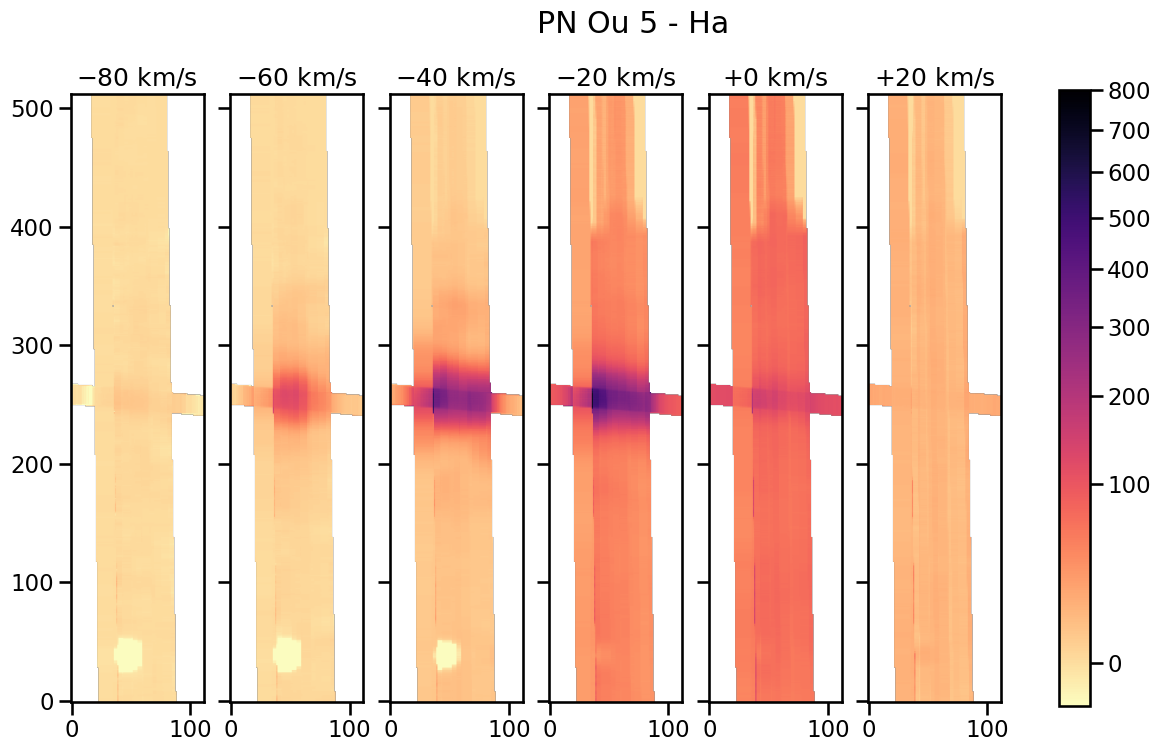

In [6]:
fig = plt.figure(figsize=(15, 8),)
axes = []
for j, v0 in enumerate([-80, -60, -40, -20, 0, 20]):
    hdulist = mes.make_vmap(
        v0, c0.ra.deg, c0.dec.deg, slit_width_scale=2.5, dvel=20.0, line_id="ha",
    )
    hdu = hdulist["scaled"]
    ax = fig.add_subplot(1, 6, j + 1, 
                         sharex=axes[0] if axes else None,
                         sharey=axes[0] if axes else None,
                         # projection=WCS(hdu.header),
                        )
    axes.append(ax)
    im = ax.imshow(
        hdu.data[:, 200:-200], 
        norm=PowerNorm(gamma=0.5, vmin=-4.0, vmax=800), 
        cmap="magma_r",
        origin="lower",
    )
    if j > 0:
        ax.tick_params(axis="y", labelleft=False)
    ax.set_title(fr"${v0:+d}$ km/s")
fig.suptitle("PN Ou 5 - Ha")
fig.colorbar(im, ax=axes)

It looks like there might be a flux calibration problem with one of the slits, which is the second from the left. 

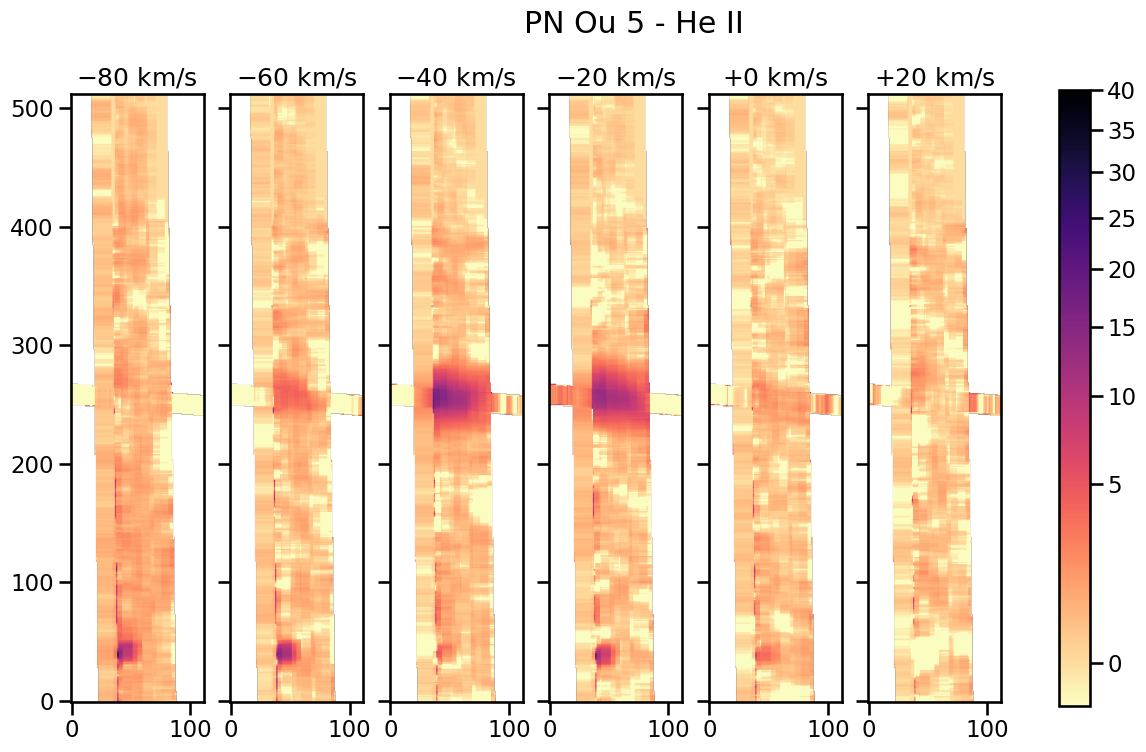

In [7]:
fig, axes = plt.subplots(
    1, 6, 
    figsize=(15, 8), 
    sharex=True,
    sharey=True,
    #subplot_kw=dict(projection=w)
)

for v0, ax in zip([-80, -60, -40, -20, 0, 20], axes):

    hdulist = mes.make_vmap(
        v0, c0.ra.deg, c0.dec.deg, slit_width_scale=2.5, dvel=20.0, line_id="heii",
    )
    hdu = hdulist["scaled"]
    im = ax.imshow(
        hdu.data[:, 200:-200], 
        norm=PowerNorm(gamma=0.5, vmin=-0.2, vmax=40.0), 
        cmap="magma_r",
        origin="lower",
    )
    ax.set_title(fr"${v0:+d}$ km/s")
fig.suptitle("PN Ou 5 - He II")
fig.colorbar(im, ax=axes)

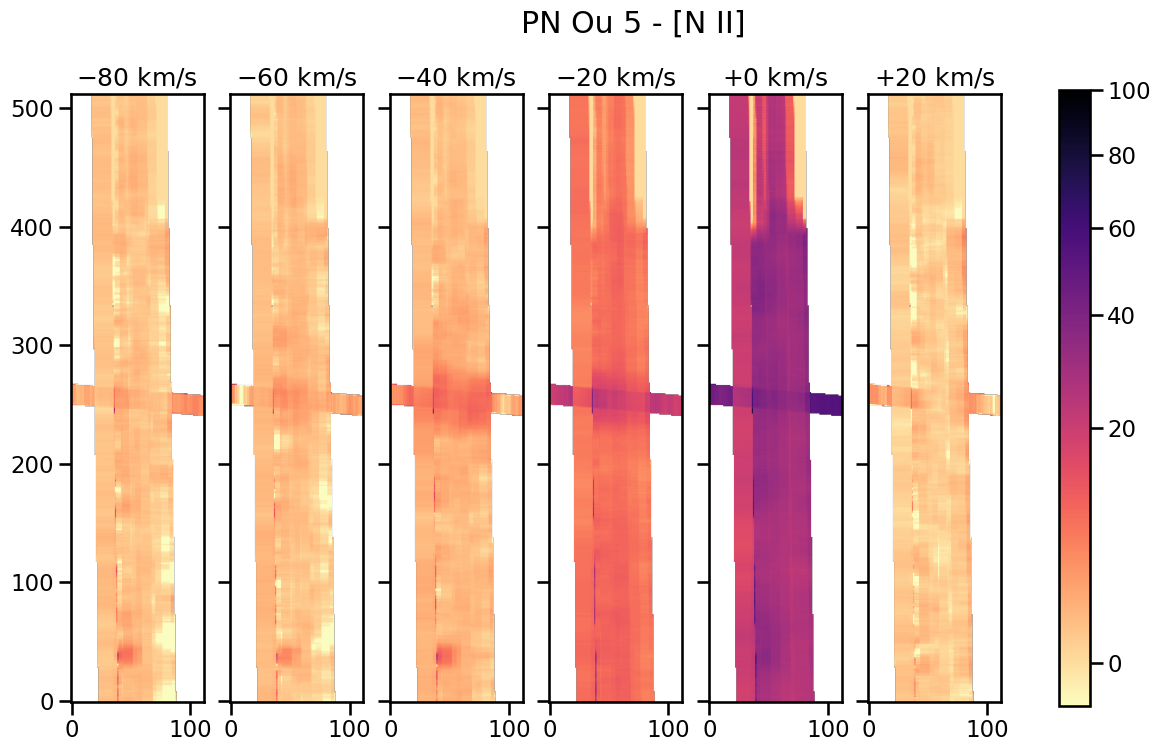

In [8]:
fig, axes = plt.subplots(
    1, 6, 
    figsize=(15, 8), 
    sharex=True,
    sharey=True,
    #subplot_kw=dict(projection=w)
)

for v0, ax in zip([-80, -60, -40, -20, 0, 20], axes):

    hdulist = mes.make_vmap(
        v0, c0.ra.deg, c0.dec.deg, slit_width_scale=2.5, dvel=20.0, line_id="nii",
    )
    hdu = hdulist["scaled"]
    im = ax.imshow(
        hdu.data[:, 200:-200], 
        norm=PowerNorm(gamma=0.5, vmin=-0.5, vmax=100.0), 
        cmap="magma_r",
        origin="lower",
    )
    ax.set_title(fr"${v0:+d}$ km/s")
fig.suptitle("PN Ou 5 - [N II]")
fig.colorbar(im, ax=axes)

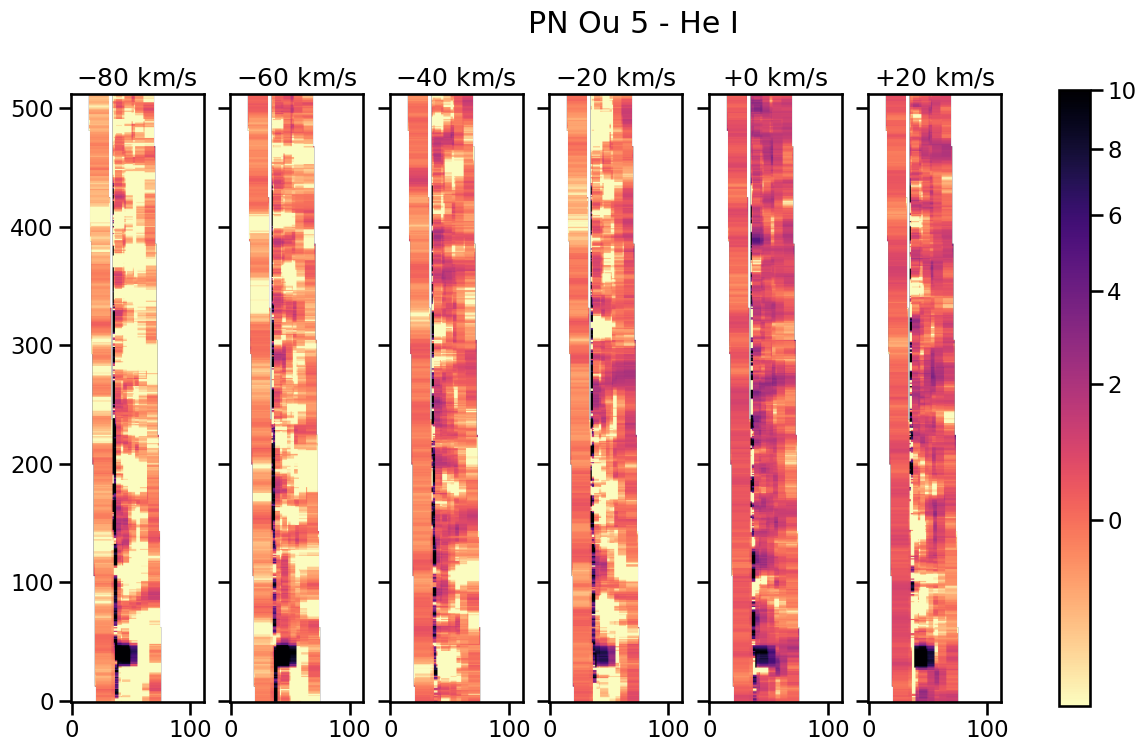

In [9]:
fig, axes = plt.subplots(
    1, 6, 
    figsize=(15, 8), 
    sharex=True,
    sharey=True,
    #subplot_kw=dict(projection=w)
)

for v0, ax in zip([-80, -60, -40, -20, 0, 20], axes):

    hdulist = mes.make_vmap(
        v0, c0.ra.deg, c0.dec.deg, slit_width_scale=2.5, dvel=20.0, line_id="hei",
    )
    hdu = hdulist["scaled"]
    im = ax.imshow(
        hdu.data[:, 200:-200], 
        norm=PowerNorm(gamma=0.5, vmin=-1, vmax=10), 
        cmap="magma_r",
        origin="lower",
    )
    ax.set_title(fr"${v0:+d}$ km/s")
fig.suptitle("PN Ou 5 - He I")
fig.colorbar(im, ax=axes)

## Fine velocity slices of 6 km/s

In [50]:
vsys = -33
dv = 10
vels = vsys + (dv // 2) + np.arange(-50, 50, dv)
nv = len(vels)
vels[:nv//2] = vels[nv//2 - 1::-1]
vels, len(vels)

(array([-38, -48, -58, -68, -78, -28, -18,  -8,   2,  12]), 10)

Make one hdu just to set up the wcs


In [45]:
hdulist = mes.make_vmap(
    vsys, c0.ra.deg, c0.dec.deg, slit_width_scale=2.5, dvel=dv, line_id="oiii",
)
hdu = hdulist["scaled"]

w = WCS(hdu.header)
w

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 318.58345833333 43.693333333333 
CRPIX : 256.5 256.5 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : -8.3333333333333e-05 8.3333333333333e-05 
NAXIS : 512  512

In [46]:
trimy, trimx = 80, 210
pixscale = 3600 * w.wcs.cdelt[1]

In [47]:
d_ra, d_dec = c0.spherical_offsets_to(w.pixel_to_world(trimx, trimy))
ww, hh = d_ra.to_value(u.arcsec), d_dec.to_value(u.arcsec)
ww, hh

(13.649999971330644, -52.64999874239205)

In [48]:
extent = [ww, -ww, hh, -hh]

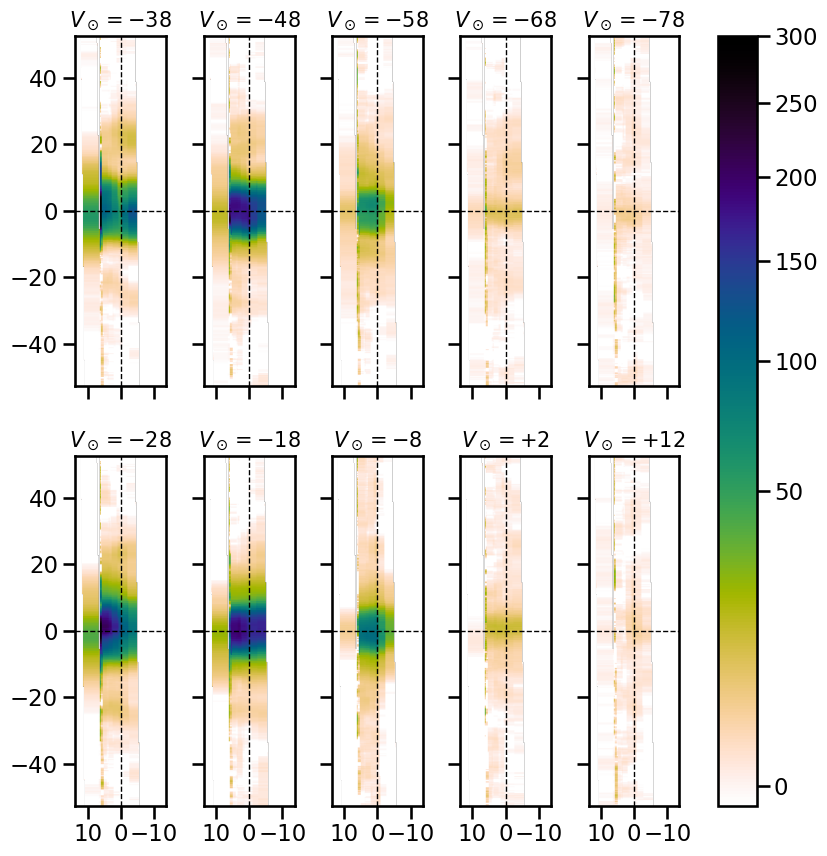

In [57]:
fig, axes = plt.subplots(
    2, len(vels)//2, 
    figsize=(10, 10), 
    sharex=True,
    sharey=True,
)

for v0, ax in zip(vels, axes.flat):

    hdulist = mes.make_vmap(
        v0, c0.ra.deg, c0.dec.deg, slit_width_scale=2.5, dvel=dv, line_id="oiii",
    )
    hdu = hdulist["scaled"]
    hdu.data -= np.nanmedian(hdu.data)
    im = ax.imshow(
        hdu.data[80:-80, 210:-210], 
        norm=PowerNorm(gamma=0.5, vmin=-0.2, vmax=300.0), 
        cmap=cmr.rainforest_r,
        extent=extent,
        origin="lower",
    )
    ax.axhline(0.0, linestyle="dashed", color="k", linewidth=1)
    ax.axvline(0.0, linestyle="dashed", color="k", linewidth=1)
    ax.set_title(fr"$V_\odot = {v0:+d}$", fontsize="small")
#fig.suptitle("PN Ou 5 - [O III] 5007")
fig.colorbar(im, ax=axes)
fig.savefig("pn-ou5-isovel-oiii.pdf");

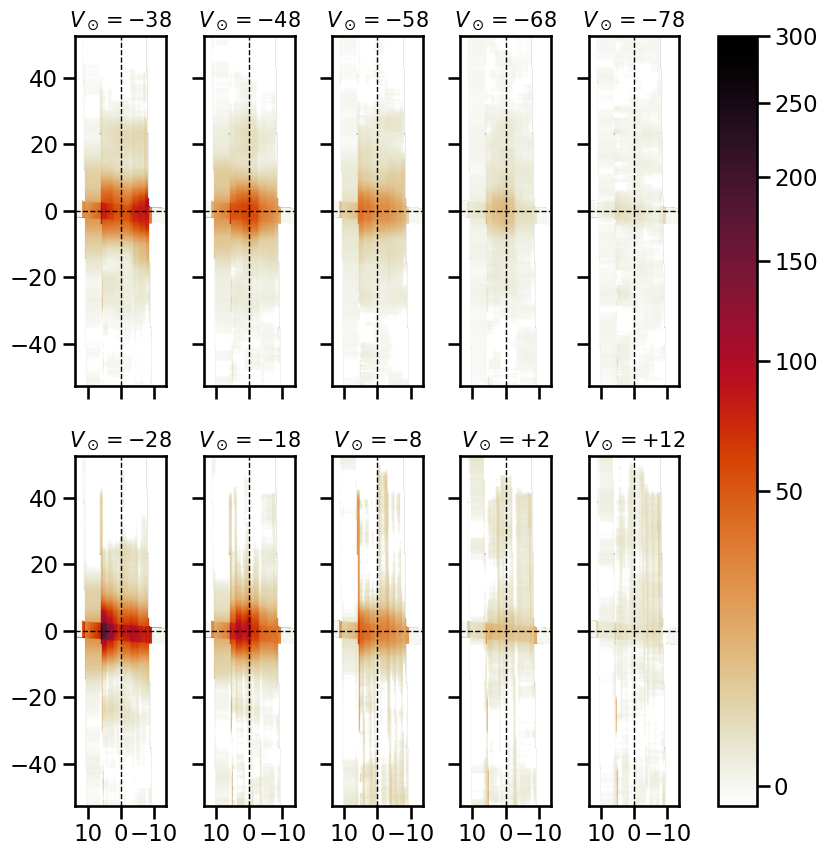

In [58]:
fig, axes = plt.subplots(
    2, len(vels)//2, 
    figsize=(10, 10), 
    sharex=True,
    sharey=True,
    #subplot_kw=dict(projection=w)
)

for v0, ax in zip(vels, axes.flat):

    hdulist = mes.make_vmap(
        v0, c0.ra.deg, c0.dec.deg, slit_width_scale=2.5, dvel=5.0, line_id="ha",
    )
    hdu = hdulist["scaled"]
    hdu.data -= np.nanmedian(hdu.data, axis=0, keepdims=True)
    im = ax.imshow(
        hdu.data[80:-80, 210:-210], 
        norm=PowerNorm(gamma=0.5, vmin=-0.2, vmax=300.0), 
        cmap=cmr.sunburst_r,
        origin="lower",
        extent=extent,
    )
    ax.axhline(0.0, linestyle="dashed", color="k", linewidth=1)
    ax.axvline(0.0, linestyle="dashed", color="k", linewidth=1)
    ax.set_title(fr"$V_\odot = {v0:+d}$", fontsize="small")
# fig.suptitle("PN Ou 5 - Ha 6563")
fig.colorbar(im, ax=axes)
fig.savefig("pn-ou5-isovel-ha.pdf");

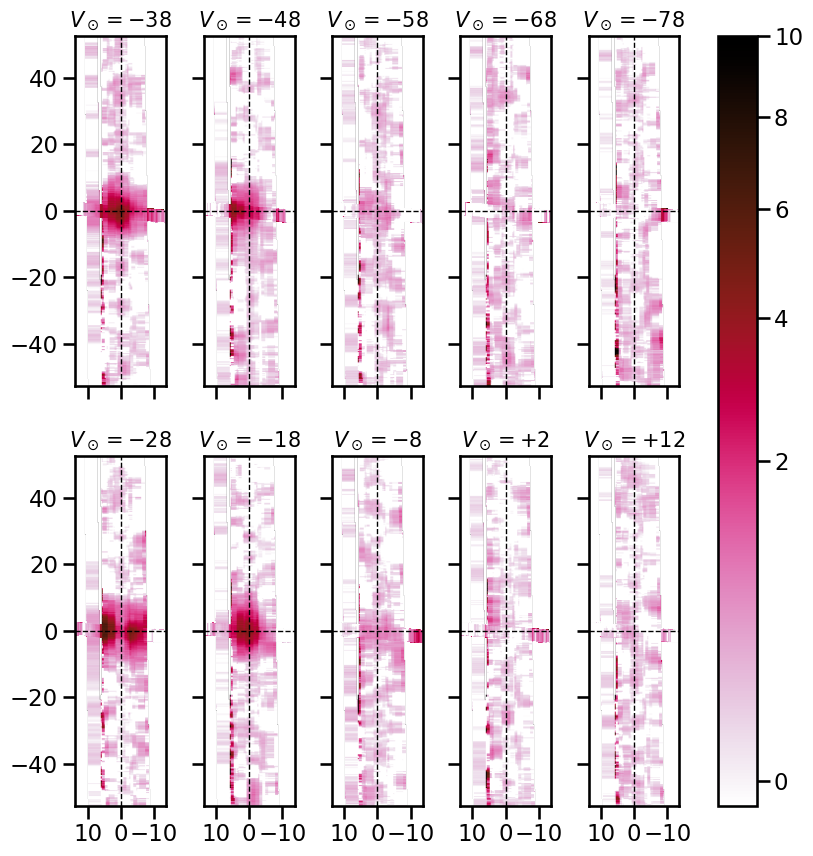

In [60]:
fig, axes = plt.subplots(
    2, len(vels)//2, 
    figsize=(10, 10), 
    sharex=True,
    sharey=True,
    #subplot_kw=dict(projection=w)
)

for v0, ax in zip(vels, axes.flat):

    hdulist = mes.make_vmap(
        v0, c0.ra.deg, c0.dec.deg, slit_width_scale=2.0, dvel=5.0, line_id="heii",
    )
    hdu = hdulist["scaled"]
    hdu.data -= np.nanmedian(hdu.data)
    im = ax.imshow(
        hdu.data[80:-80, 210:-210], 
        norm=PowerNorm(gamma=0.5, vmin=-0.01, vmax=10.0), 
        cmap=cmr.flamingo_r,
        origin="lower",
        extent=extent,
    )
    ax.set_title(fr"$V_\odot = {v0:+d}$", fontsize="small")
    ax.axhline(0.0, linestyle="dashed", color="k", linewidth=1)
    ax.axvline(0.0, linestyle="dashed", color="k", linewidth=1)

# fig.suptitle("PN Ou 5 - He II 6560")
fig.colorbar(im, ax=axes)
fig.savefig("pn-ou5-isovel-heii.pdf");

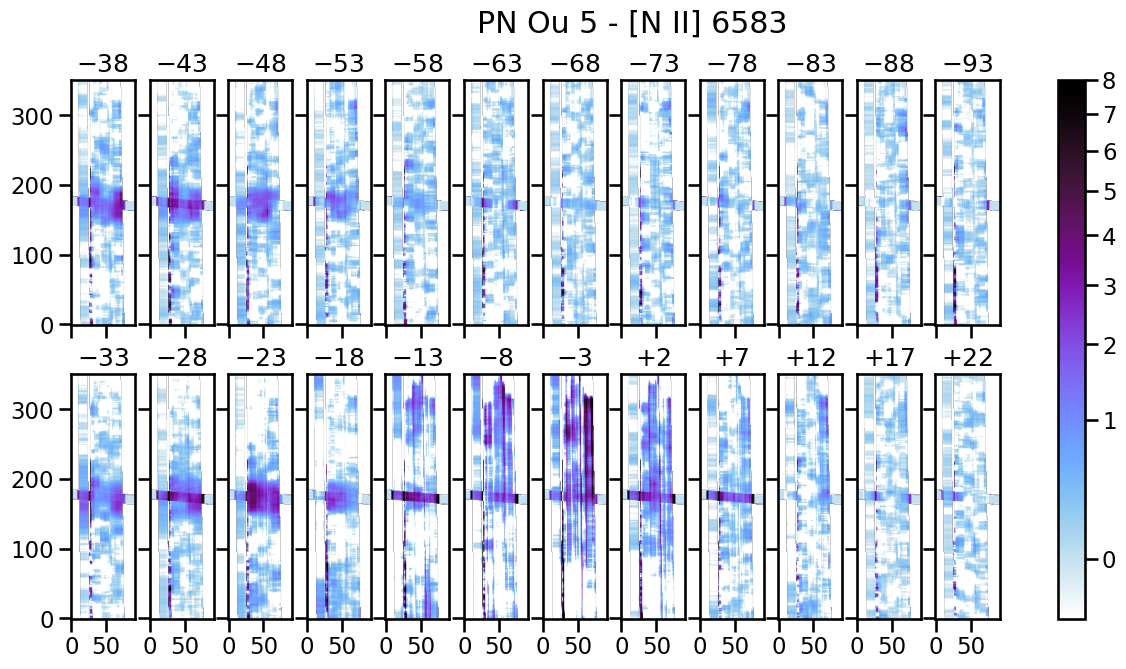

In [14]:
fig, axes = plt.subplots(
    2, 12, 
    figsize=(15, 7), 
    sharex=True,
    sharey=True,
    #subplot_kw=dict(projection=w)
)

for v0, ax in zip(vels, axes.flat):

    hdulist = mes.make_vmap(
        v0, c0.ra.deg, c0.dec.deg, slit_width_scale=2.0, dvel=5.0, line_id="nii",
    )
    hdu = hdulist["scaled"]
    hdu.data -= np.nanmedian(hdu.data, axis=0, keepdims=True)
    im = ax.imshow(
        hdu.data[80:-80, 210:-210], 
        norm=PowerNorm(gamma=0.5, vmin=-0.1, vmax=8.0), 
        cmap=cmr.voltage_r,
        origin="lower",
    )
    ax.set_title(fr"${v0:+d}$")
fig.suptitle("PN Ou 5 - [N II] 6583")
fig.colorbar(im, ax=axes)
fig.savefig("pn-ou5-isovel-nii.jpg");

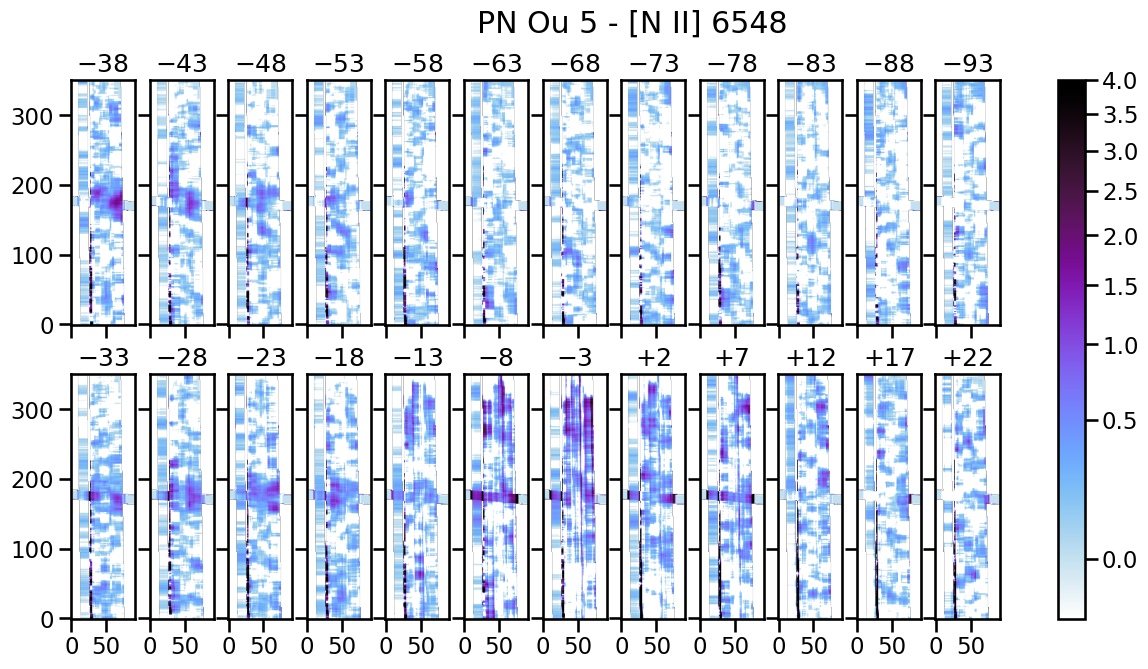

In [15]:
fig, axes = plt.subplots(
    2, 12, 
    figsize=(15, 7), 
    sharex=True,
    sharey=True,
    #subplot_kw=dict(projection=w)
)

for v0, ax in zip(vels, axes.flat):

    hdulist = mes.make_vmap(
        v0, c0.ra.deg, c0.dec.deg, slit_width_scale=2.0, dvel=5.0, line_id="nii_s",
    )
    hdu = hdulist["scaled"]
    hdu.data -= np.nanmedian(hdu.data, axis=0, keepdims=True)
    im = ax.imshow(
        hdu.data[80:-80, 210:-210], 
        norm=PowerNorm(gamma=0.5, vmin=-0.05, vmax=4.0), 
        cmap=cmr.voltage_r,
        origin="lower",
    )
    ax.set_title(fr"${v0:+d}$")
fig.suptitle("PN Ou 5 - [N II] 6548")
fig.colorbar(im, ax=axes)
fig.savefig("pn-ou5-isovel-nii_s.jpg");

/Users/will/Dropbox/teresa-pn-ou5/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/will/Dropbox/teresa-pn-ou5/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/will/Dropbox/teresa-pn-ou5/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/will/Dropbox/teresa-pn-ou5/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/will/Dropbox/teresa-pn-ou5/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encounter

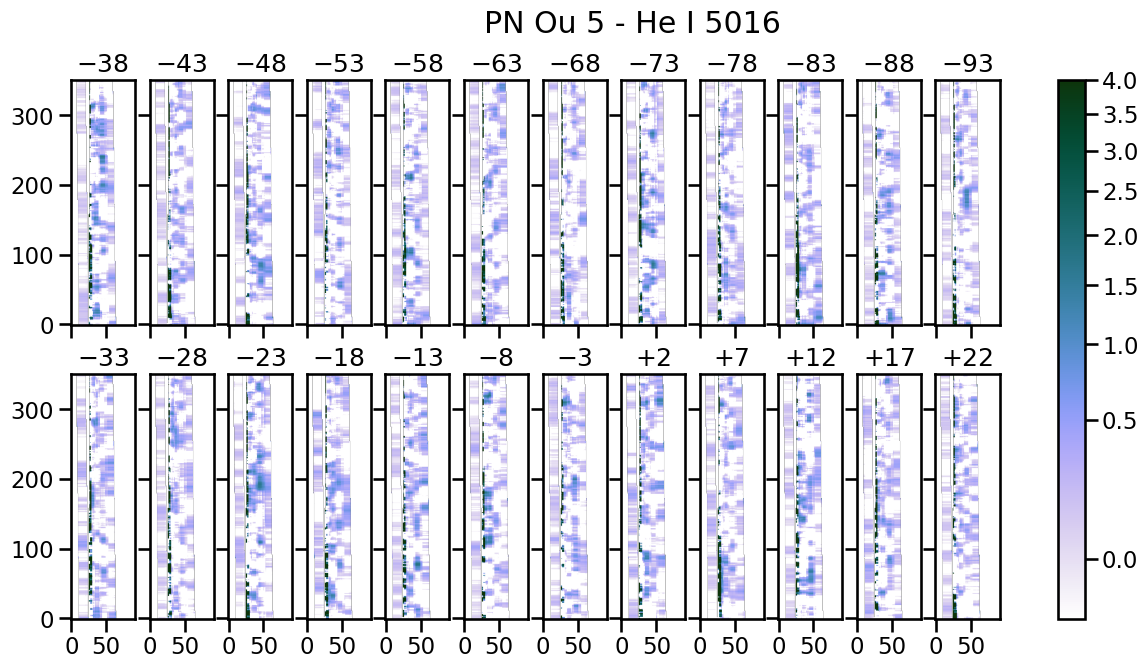

In [16]:
fig, axes = plt.subplots(
    2, 12, 
    figsize=(15, 7), 
    sharex=True,
    sharey=True,
    #subplot_kw=dict(projection=w)
)

for v0, ax in zip(vels, axes.flat):

    hdulist = mes.make_vmap(
        v0, c0.ra.deg, c0.dec.deg, slit_width_scale=2.0, dvel=5.0, line_id="hei",
    )
    hdu = hdulist["scaled"]
    hdu.data -= np.nanmedian(hdu.data, axis=0, keepdims=True)
    im = ax.imshow(
        hdu.data[80:-80, 210:-210], 
        norm=PowerNorm(gamma=0.5, vmin=-0.05, vmax=4.0), 
        cmap=cmr.horizon_r,
        origin="lower",
    )
    ax.set_title(fr"${v0:+d}$")
fig.suptitle("PN Ou 5 - He I 5016")
fig.colorbar(im, ax=axes)
fig.savefig("pn-ou5-isovel-hei.jpg");